In [2]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Read in and Explore the Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
features_details = train.describe(include = "all");
nan_value_detail = pd.isnull(train).sum();
print(features_details)
print(nan_value_detail)
print(train['disbursed_amount'])

             UniqueID  disbursed_amount    asset_cost            ltv  \
count   233154.000000     233154.000000  2.331540e+05  233154.000000   
unique            NaN               NaN           NaN            NaN   
top               NaN               NaN           NaN            NaN   
freq              NaN               NaN           NaN            NaN   
mean    535917.573376      54356.993528  7.586507e+04      74.746530   
std      68315.693711      12971.314171  1.894478e+04      11.456636   
min     417428.000000      13320.000000  3.700000e+04      10.030000   
25%     476786.250000      47145.000000  6.571700e+04      68.880000   
50%     535978.500000      53803.000000  7.094600e+04      76.800000   
75%     595039.750000      60413.000000  7.920175e+04      83.670000   
max     671084.000000     990572.000000  1.628992e+06      95.000000   

            branch_id    supplier_id  manufacturer_id  Current_pincode_ID  \
count   233154.000000  233154.000000    233154.000000     

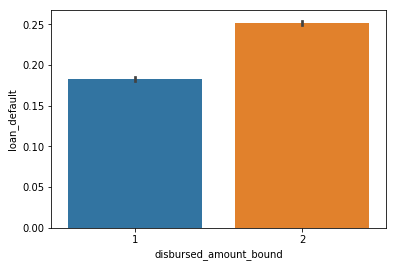

In [4]:
#map Fare values into groups of numerical values
train['disbursed_amount_bound'] = pd.qcut(train['disbursed_amount'], 2, labels = [1, 2])
test['disbursed_amount_bound'] = pd.qcut(test['disbursed_amount'], 2, labels = [1, 2])
#drop Fare values
#train = train.drop(['disbursed_amount'], axis = 1)
#test = test.drop(['disbursed_amount'], axis = 1)
sns.barplot(x="disbursed_amount_bound", y="loan_default", data=train)

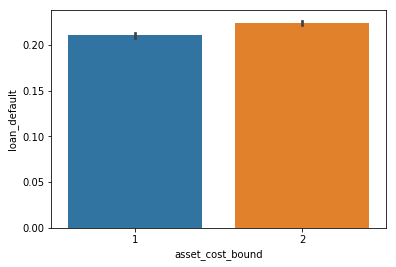

In [5]:
#map Fare values into groups of numerical values
train['asset_cost_bound'] = pd.qcut(train['asset_cost'], 2, labels = [1, 2])
test['asset_cost_bound'] = pd.qcut(test['asset_cost'], 2, labels = [1, 2])
#drop Fare values
#train = train.drop(['disbursed_amount'], axis = 1)
#test = test.drop(['disbursed_amount'], axis = 1)
sns.barplot(x="asset_cost_bound", y="loan_default", data=train)

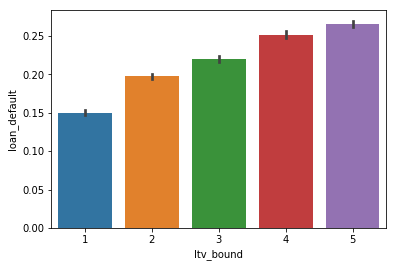

In [6]:
#map Fare values into groups of numerical values
train['ltv_bound'] = pd.qcut(train['ltv'], 5, labels = [1, 2,3,4,5])
test['ltv_bound'] = pd.qcut(test['ltv'], 5, labels = [1, 2,3,4,5])
#drop Fare values
#train = train.drop(['disbursed_amount'], axis = 1)
#test = test.drop(['disbursed_amount'], axis = 1)
sns.barplot(x="ltv_bound", y="loan_default", data=train)

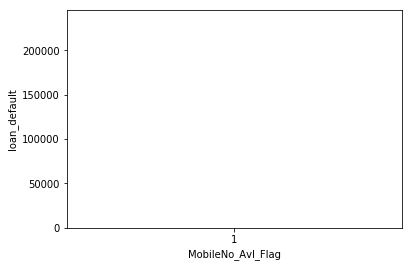

In [7]:
sns.distplot(train["MobileNo_Avl_Flag"],kde=False, bins=10)
#sns.catplot(x="loan_default",y='MobileNo_Avl_Flag',data=train)
sns.barplot(x="MobileNo_Avl_Flag", y="loan_default", data=train)

In [8]:
train["Employment.Type"] = train["Employment.Type"].fillna('Self employed')
#map each Embarked value to a numerical value
et_mapping = {"Self employed": 1, "Salaried": 2}
train['Employment.Type'] = train['Employment.Type'].map(et_mapping)
test['Employment.Type'] = test['Employment.Type'].map(et_mapping)

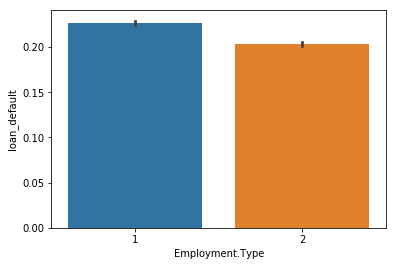

In [9]:
sns.barplot(x="Employment.Type", y="loan_default", data=train)

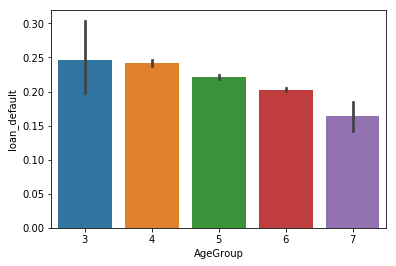

In [10]:
train['age'] = train['Date.of.Birth'].str.replace('-', '')
test['age'] = test['Date.of.Birth'].str.replace('-', '')
now = pd.Timestamp('now')
train['age'] = pd.to_datetime(train['age'], format='%d%m%y')    # 1
test['age'] = pd.to_datetime(test['age'], format='%d%m%y')    # 1
train['age'] = train['age'].where(train['age'] < now, train['age'] -  np.timedelta64(100, 'Y'))   # 2
test['age'] = test['age'].where(test['age'] < now, test['age'] -  np.timedelta64(100, 'Y'))   # 2
train['agec'] = (now - train['age']).astype('<m8[Y]')    # 3
test['agec'] = (now - train['age']).astype('<m8[Y]')    # 3

#sort the ages into logical categories
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["agec"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["agec"], bins, labels = labels)

age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="loan_default", data=train)
plt.show()

In [11]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,disbursed_amount_bound,asset_cost_bound,ltv_bound,age,agec,AgeGroup
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,2,...,0yrs 0mon,0yrs 0mon,0,0,1,1,5,1984-01-01,35.0,5
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,1,...,1yrs 11mon,1yrs 11mon,0,1,1,1,2,1985-07-31,33.0,5
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,1,...,0yrs 0mon,0yrs 0mon,0,0,1,1,5,1985-08-24,33.0,5
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,1,...,0yrs 8mon,1yrs 3mon,1,1,2,1,5,1993-12-30,25.0,5
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,1,...,0yrs 0mon,0yrs 0mon,1,1,1,1,5,1977-12-09,41.0,6


In [12]:
train['doc_total'] = train['MobileNo_Avl_Flag']+train['Aadhar_flag']+train['PAN_flag']+train['VoterID_flag']+train['Driving_flag']+train['Passport_flag']
test['doc_total'] = test['MobileNo_Avl_Flag']+test['Aadhar_flag']+test['PAN_flag']+test['VoterID_flag']+test['Driving_flag']+test['Passport_flag']

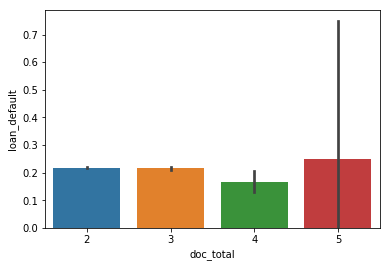

In [13]:
#draw a bar plot of Age vs. survival
sns.barplot(x="doc_total", y="loan_default", data=train)
plt.show()

In [14]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,disbursed_amount_bound,asset_cost_bound,ltv_bound,age,agec,AgeGroup,doc_total
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,2,...,0yrs 0mon,0,0,1,1,5,1984-01-01,35.0,5,2
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,1,...,1yrs 11mon,0,1,1,1,2,1985-07-31,33.0,5,2
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,1,...,0yrs 0mon,0,0,1,1,5,1985-08-24,33.0,5,2
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,1,...,1yrs 3mon,1,1,2,1,5,1993-12-30,25.0,5,2
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,1,...,0yrs 0mon,1,1,1,1,5,1977-12-09,41.0,6,2


In [15]:
print(np.unique(train['PERFORM_CNS.SCORE.DESCRIPTION']))

['A-Very Low Risk' 'B-Very Low Risk' 'C-Very Low Risk' 'D-Very Low Risk'
 'E-Low Risk' 'F-Low Risk' 'G-Low Risk' 'H-Medium Risk' 'I-Medium Risk'
 'J-High Risk' 'K-High Risk' 'L-Very High Risk' 'M-Very High Risk'
 'No Bureau History Available'
 'Not Scored: More than 50 active Accounts found'
 'Not Scored: No Activity seen on the customer (Inactive)'
 'Not Scored: No Updates available in last 36 months'
 'Not Scored: Not Enough Info available on the customer'
 'Not Scored: Only a Guarantor'
 'Not Scored: Sufficient History Not Available']


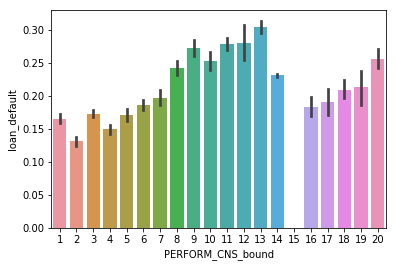

In [16]:
PERFORM_CNS_mapping = {'A-Very Low Risk': 1,
               'B-Very Low Risk': 2,
               'C-Very Low Risk': 3,
               'D-Very Low Risk': 4,
               'E-Low Risk': 5,
               'F-Low Risk': 6,
               'G-Low Risk': 7,
               'H-Medium Risk':8,
               'I-Medium Risk':9,
               'J-High Risk':10,
               'K-High Risk':11,
               'L-Very High Risk':12,
               'M-Very High Risk':13,
               'No Bureau History Available':14,
               'Not Scored: More than 50 active Accounts found':15,
               'Not Scored: No Activity seen on the customer (Inactive)':16,
               'Not Scored: No Updates available in last 36 months':17,
               'Not Scored: Not Enough Info available on the customer':18,
               'Not Scored: Only a Guarantor':19,
               'Not Scored: Sufficient History Not Available':20
              }
train['PERFORM_CNS_bound'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].map(PERFORM_CNS_mapping)
test['PERFORM_CNS_bound'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].map(PERFORM_CNS_mapping)
#draw a bar plot of Age vs. survival
sns.barplot(x="PERFORM_CNS_bound", y="loan_default", data=train)
plt.show()

In [17]:
train['total_accounts'] = train['PRI.NO.OF.ACCTS']+train['SEC.NO.OF.ACCTS']
test['total_accounts'] = test['PRI.NO.OF.ACCTS']+test['SEC.NO.OF.ACCTS']

train['total_activate_accounts'] = train['PRI.ACTIVE.ACCTS']+train['SEC.ACTIVE.ACCTS']
test['total_activate_accounts'] = test['PRI.ACTIVE.ACCTS']+test['SEC.ACTIVE.ACCTS']

train['total_overdue_accounts'] = train['PRI.OVERDUE.ACCTS']+train['SEC.OVERDUE.ACCTS']
test['total_overdue_accounts'] = test['PRI.OVERDUE.ACCTS']+test['SEC.OVERDUE.ACCTS']

train['total_installment_amount'] = train['PRIMARY.INSTAL.AMT']+train['SEC.INSTAL.AMT']
test['total_installment_amount'] = test['PRIMARY.INSTAL.AMT']+test['SEC.INSTAL.AMT']


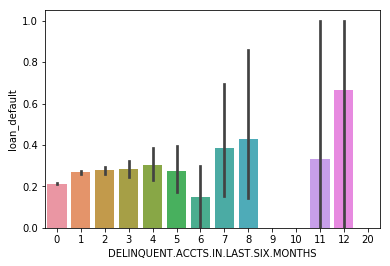

In [18]:
sns.barplot(x="DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS", y="loan_default", data=train)
plt.show()

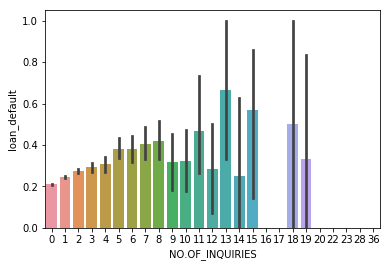

In [19]:
sns.barplot(x="NO.OF_INQUIRIES", y="loan_default", data=train)
plt.show()

In [20]:
nan_value_detail = pd.isnull(train).sum();
print(nan_value_detail)

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [21]:
from sklearn.model_selection import train_test_split
x = train.drop(['UniqueID', 'disbursed_amount','asset_cost','ltv','branch_id','supplier_id','manufacturer_id','Current_pincode_ID','Date.of.Birth','DisbursalDate','State_ID','Employee_code_ID','MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag','PERFORM_CNS.SCORE.DESCRIPTION','PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','loan_default','age','agec'], axis=1)
y = train["loan_default"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [22]:
 #Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)


78.36
78.35
72.94
76.8


In [23]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

47.91
78.36


In [24]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_logreg, 
              acc_randomforest, acc_gaussian, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Naive Bayes,78.36
5,Gradient Boosting Classifier,78.36
0,Logistic Regression,78.35
1,Random Forest,76.80
3,Decision Tree,72.94
4,Stochastic Gradient Descent,47.91


In [25]:
#confusion metrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(gbk, x_train, y_train, cv=3)
CM = confusion_matrix(y_train, predictions)
#precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))
#f1 score
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

Precision: 0.47560975609756095
Recall: 0.0020527396178746248


0.00408783606729207